In [232]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from collections import Counter

# Functions:

function that shows the image:

In [233]:
def showImage(image):
    plt.imshow(image)

Function that takes a path of an image and shows it:

In [234]:
def originalImageOpen(PATH):
    image = Image.open(PATH)
    plt.imshow(image)

imOpen Function:

In [235]:
# passes by each pixel and converting the values to greyscale
def imOpen(PATH):
    originalImage = Image.open(PATH)
    image = originalImage.copy()
    for i in range(0, image.size[0]):
        for j in range(0, image.size[1]):
            r, g, b = image.getpixel((i, j))
            grayPixel = (0.3 * r) + (0.59 * g) + (0.11 * b)
            grayPixel = int(grayPixel)
            image.putpixel((i, j), (grayPixel, grayPixel, grayPixel))
    return image

toStrH Function:

In [236]:
# row wise run length coding
def toStrH(image):
    rowWiseRunLengthCode = "H" + " " + \
        str(image.size[0]) + " " + str(image.size[1])
    firstTime = True
    iOut = ""  # last pixel tested
    # j is the row number
    for j in range(0, image.size[1]):
        rowWiseRunLengthCode = rowWiseRunLengthCode + str(iOut) + "\n"
        firstTime = True
        # i is the column number
        for i in range(0, image.size[0]-1):
            iOut = str(i)
            if(firstTime):
                # run length code type and image dimension
                firstTime = False
                newr, newg, newb = image.getpixel((i, j))
                r, g, b = newr, newg, newb
                rowWiseRunLengthCode = rowWiseRunLengthCode + \
                    str(r) + " " + str(i) + " "
            else:
                # comparing colors of each pixel to know the run length code
                newr, newg, newb = image.getpixel((i, j))
                if(newr != r):
                    r, g, b = newr, newg, newb
                    rowWiseRunLengthCode = rowWiseRunLengthCode + \
                        str(i-1) + " " + str(r) + " " + str(i) + " "
    rowWiseRunLengthCode = rowWiseRunLengthCode + str(iOut)
    return rowWiseRunLengthCode

toStrV Function:

In [237]:
def toStrV(image):
    columnWiseRunLengthCode = "V" + " " + \
        str(image.size[0]) + " " + str(image.size[1])
    firstTime = True
    jOut = ""  # last pixel tested
    # i is the column number
    for i in range(0, image.size[0]):
        columnWiseRunLengthCode = columnWiseRunLengthCode + str(jOut) + "\n"
        firstTime = True
        # J is the column number
        for j in range(0, image.size[1]-1):
            jOut = str(j)
            if(firstTime):
                # run length code type and image dimension
                firstTime = False
                newr, newg, newb = image.getpixel((i, j))
                r, g, b = newr, newg, newb
                columnWiseRunLengthCode = columnWiseRunLengthCode + \
                    str(r) + " " + str(j) + " "
            else:
                newr, newg, newb = image.getpixel((i, j))
                if(newr != r):
                    # comparing colors of each pixel to know the run length code
                    r, g, b = newr, newg, newb
                    columnWiseRunLengthCode = columnWiseRunLengthCode + \
                        str(j-1) + " " + str(r) + " " + str(j) + " "
    columnWiseRunLengthCode = columnWiseRunLengthCode + str(jOut)
    return columnWiseRunLengthCode

toFile Function:

In [238]:
# saving run length code to file in directory: F:/GUC/Computer Vision/
def toFile(name, runLengthCode):
    path = 'F:/GUC/Computer Vision/' + name
    file = open(path, 'w+')
    file.write(runLengthCode)
    file.close()

toImg Function:

In [239]:
# generating image from run length coding
def toImg(path):
    file = open(path, 'r')
    lines = file.readlines()  # array of lines
    values = lines[0].split()  # array of values
    # image dimensions
    image = Image.new('RGB', (int(values[1]), int(values[2])))
    rltype = ""
    firstLine = True
    index = 0
    for j in lines:
        values = lines[index].split()
        # knowing run length coding type (H or V)
        if(lines[0][0] == 'H'and (firstLine)):
            rltype = 'H'
        if(lines[0][0] == 'V'and (firstLine)):
            rltype = 'V'
        if(rltype == 'H' and not(firstLine)):
            i = 0
            # taking 3 values at a time: color, start pixel and end pixel
            while i <= (len(values)-3):
                color = values[i]
                start = values[i+1]
                end = values[i+2]
                color = int(color)
                start = int(start)
                end = int(end)
                # filling in pixels with color between start and end index
                while start < (end+1):
                    image.putpixel((start, index-1), (color, color, color))
                    start = start + 1
                i = i+3
        if(rltype == 'V' and not(firstLine)):
            i = 0
            # taking 3 values at a time: color, start pixel and end pixel
            while i <= (len(values)-3):
                color = values[i]
                start = values[i+1]
                end = values[i+2]
                color = int(color)
                start = int(start)
                end = int(end)
                # filling in pixels with color between start and end index
                while start < (end+1):
                    image.putpixel((index-1, start), (color, color, color))
                    start = start + 1
                i = i+3
        index = index + 1
        firstLine = False
    return image

# Image Bars:

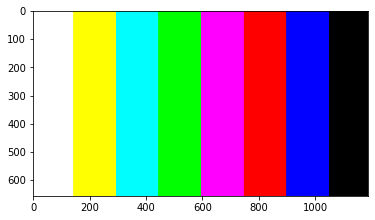

In [240]:
originalImageOpen('F:/GUC/Computer Vision/bars.bmp')

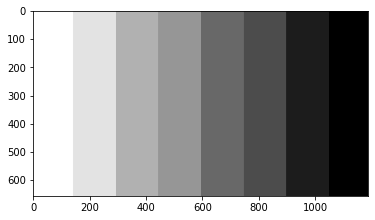

In [241]:
greyScaleImage = imOpen('F:/GUC/Computer Vision/bars.bmp')
showImage(greyScaleImage)

In [242]:
rowWiseRunLengthCode = toStrH(greyScaleImage)
columnWiseRunLengthCode = toStrV(greyScaleImage)

In [243]:
print("Character Count in row wise length coding: " +
      str(len(rowWiseRunLengthCode)))
print("Character Count in column wise length coding: " +
      str(len(columnWiseRunLengthCode)))

Character Count in row wise length coding: 238138
Character Count in column wise length coding: 11309


In [244]:
toFile("H.txt", rowWiseRunLengthCode)
toFile("V.txt", columnWiseRunLengthCode)

# Image Bars2:

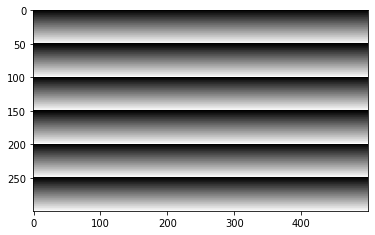

In [245]:
originalImageOpen('F:/GUC/Computer Vision/bars2.bmp')

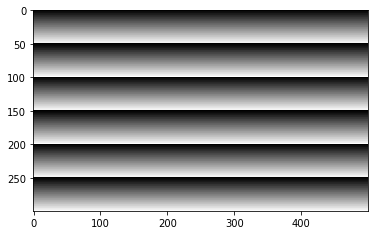

In [246]:
greyScaleImage2 = imOpen('F:/GUC/Computer Vision/bars2.bmp')
showImage(greyScaleImage2)

In [247]:
rowWiseRunLengthCode2 = toStrH(greyScaleImage2)
columnWiseRunLengthCode2 = toStrV(greyScaleImage2)

In [248]:
print("Character Count in row wise length coding: " +
      str(len(rowWiseRunLengthCode2)))
print("Character Count in column wise length coding: " +
      str(len(columnWiseRunLengthCode2)))

Character Count in row wise length coding: 2877
Character Count in column wise length coding: 1618009


In [249]:
toFile("H2.txt", rowWiseRunLengthCode2)
toFile("V2.txt", columnWiseRunLengthCode2)

# compression effectiveness for each of the run-length codes:

The first image, Bars, had a row wise run length code with a character length of 238138 and a column wise run length code with a character length of 11309. Meaning that column wise run length coding was better. However, if we look at the second image, Bars2, we will see that it had a row wise run length code with a character length of 2877 and a column wise run length code with a character length of 1629009. Meaning that row wise run length coding was better. This shows that neither are the perfect way to make run length coding. It all depends on the image itself. In Bars column wise run length coding preformed better because the image changed color after some columns. Meaning that the color would be constant in the all columns and therefore, the characters in each line in the string is smaller as the start index and end index has a huge in between. If we look at the row wise run length coding on the Bars image each line contains a lot of characters because the color rate of changing is higher row wise needing different start and end indexes for each color and therefore, taking more space and decreasing the compression effectiveness. Vice versa in the Bars2 Image the color change rate is higher in the columns and therefore, row wise run length coding created a more effective compression technique.  

# Mystery Image 1:

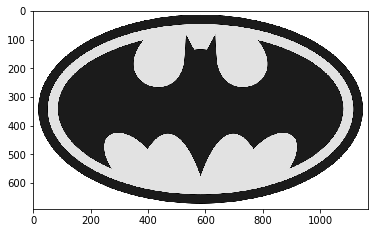

In [250]:
mysteryImage1 = toImg("F:/GUC/Computer Vision/Mystery1.txt")
showImage(mysteryImage1)

# Mystery Image 2:

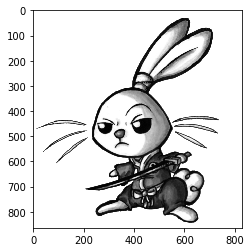

In [251]:
mysteryImage2 = toImg("F:/GUC/Computer Vision/Mystery2.txt")
showImage(mysteryImage2)